# Signal analysis - Assignment 3
##Duty 2 - echo removal
by Øystein Hiåsen (hiasen@stud.ntnu.no)

In [2]:
import numpy as np
from scipy.io import wavfile

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# First we read in the wav-file.
filename = "echo_ex.wav"
fs, sound = wavfile.read(filename)

# time to sample conversion function
t2s = lambda x: int(x*fs)

N = len(sound)
sound_length = N/fs

# And create the corresponding time vector
time = np.linspace(0, sound_length, N)

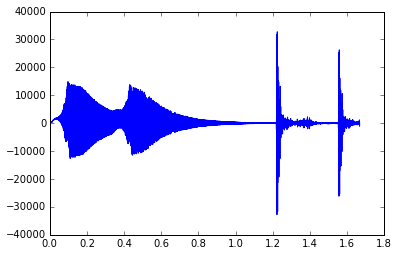

In [4]:
plt.plot(time, sound)

Let $y$ be the signal with echo and $x$ be the signal without echo.

Then a model for the echo with a lag of $n$ samples is

$$ y[i] = x[i] + a x[i - n]$$
where $a$ is the attenuation constant.

If we rearrange this equation we get
$$ x[i] = y[i] - a x[i - n] \ \mathrm{for} \ i \geq n$$
and 
$$ x[i] = y[i] \ \mathrm{for} \ i < n $$


The constant $n$ can be found by looking at a autocorrelation plot.

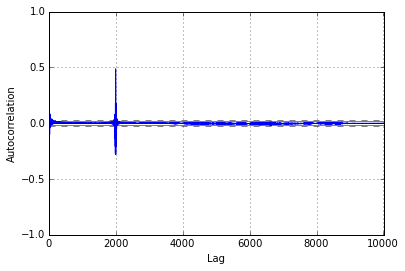

In [5]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(sound)

From the above autocorrelation plot we can see that the echo lags by $n=2000$ samples.

The constant $a$ was found by trying different values.

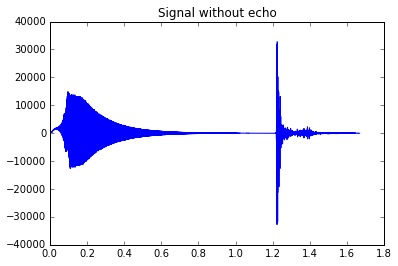

In [6]:
n = 2000
a = 0.8
x = sound.copy()

for i in range(n, N-1, n):
    x[i:i+n] -= a*x[i-n:i]

plt.plot(time, x)
plt.title("Signal without echo")

Looks good

In [7]:
wavfile.write("without_echo.wav", rate=fs, data=x)

and sounds good.